# What attributes are important for a good beer?

## 1. Objective

The goal of this analysis is to identify the key attributes that contribute to a high-quality beer as perceived by reviewers.  Specifically, we aim to determine which beer characteristics—such as alcohol content, aroma, appearance, palate, and taste—have the most significant impact on a beer's overall rating. This will help breweries understand what aspects to prioritize in order to maximize customer satisfaction.

To achieve this, we will utilize a dataset containing over 1.5 million beer reviews, which can be found on https://www.kaggle.com/rdoume/beerreviews. Using linear regression, we will explore the relationship between these beer attributes and their overall review scores, providing insights into which factors influence beer quality the most.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("beer_reviews.csv")

## 2. Understanding the data

In [92]:
print(df.head(5))


   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stou

**Key Features in the dataset:**

- `beer_abv`:This stands for "Alcohol by Volume" (ABV), a standard measure used worldwide to quantify the amount of alcohol (ethanol) in an alcoholic beverage. It’s expressed as a percentage of total volume. Higher ABV values indicate stronger beers.
- `review_aroma`: A subjective score based on the scent or fragrance of the beer, which can include notes of malt, hops, yeast, spices, and other characteristics that contribute to a beer's smell.
- `review-appearance`:This score reflects the appearance of the beer, including factors like color, clarity, head (foam), and how appealing it looks to the reviewer.
- `review-palate`: This is a rating of the beer's mouthfeel or texture, which includes sensations like carbonation, smoothness, creaminess, and body (how heavy or light it feels in the mouth).
- `review-taste`:  This is the score for the beer's flavor. It includes how well the flavors (such as bitterness, sweetness, sourness) balance, the complexity of the taste, and the aftertaste.
- `review-overall`:This is an overall rating that likely summarizes the reviewer's general impression of the beer. 

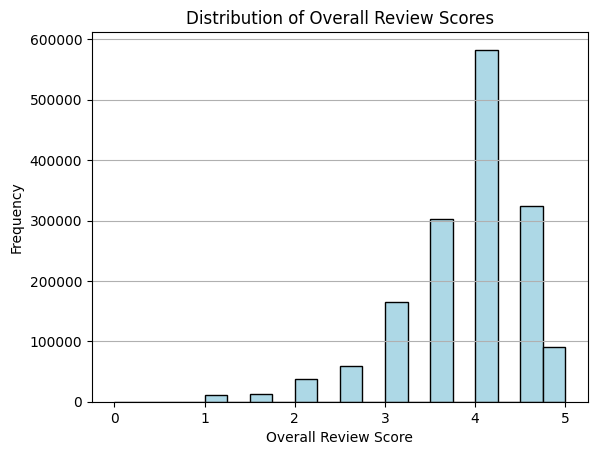

In [93]:
# distribution of review scores
plt.hist(df['review_overall'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Overall Review Scores')
plt.xlabel('Overall Review Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

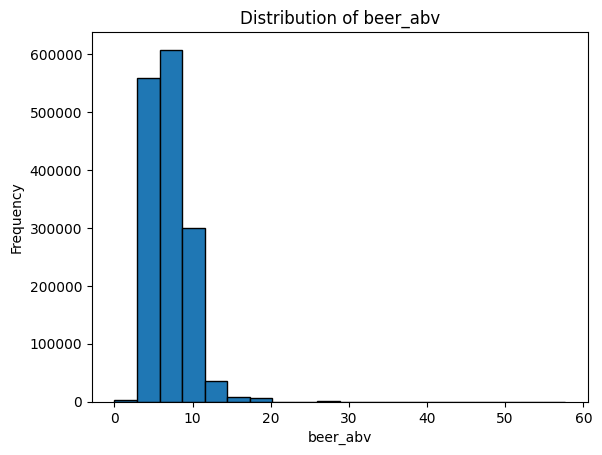

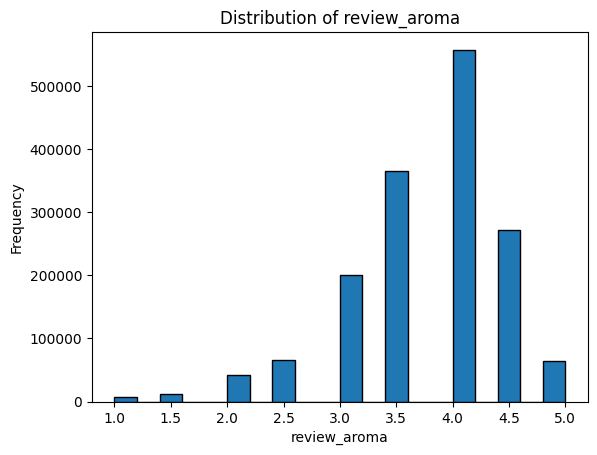

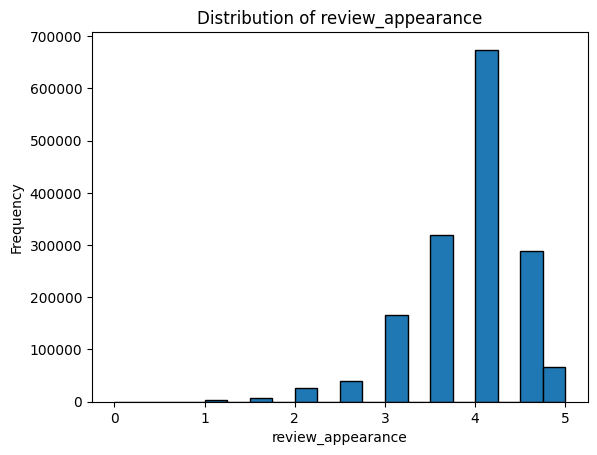

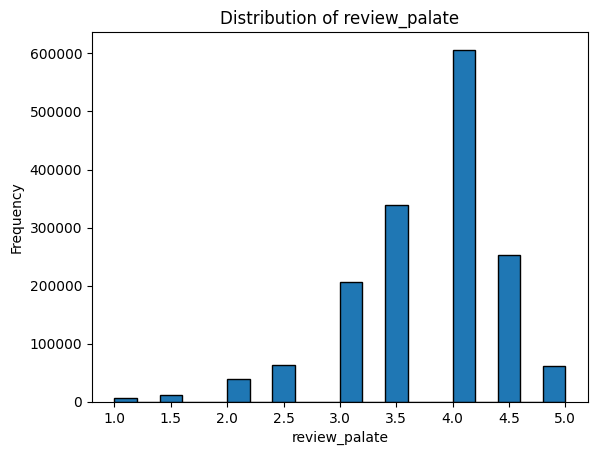

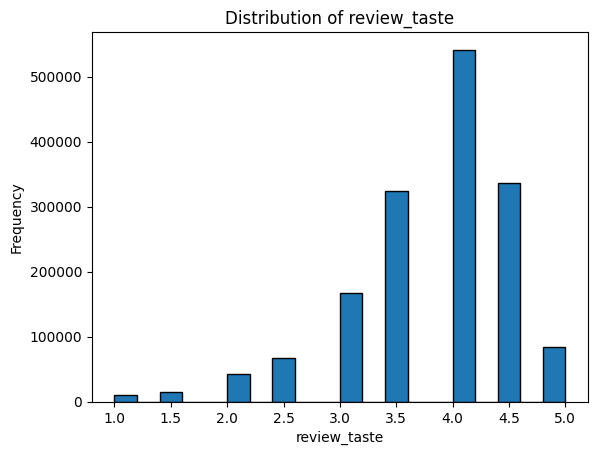

In [94]:
for col in ['beer_abv', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']:
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show() 

## 3. Data Preparation

Picking out the important attributes from the dataset:

In [95]:
df_clean = df[['beer_abv', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']].dropna()

Making sure that there are no missing values in the dataset.

In [96]:
print("Missing values:")
print(df_clean.isnull().sum())

Missing values:
beer_abv             0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
dtype: int64


## 4. Modeling 

We use linear regression for this beer review dataset because it provides a simple, interpretable way to quantify how various attributes like aroma, appearance, taste, and ABV influence the overall beer rating. By examining the model's coefficients, we can identify which factors have the most significant impact on a beer's quality.

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining the feature set (X) and target variable (y)
X_overall = df_clean[['beer_abv', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']]
y_overall = df_clean['review_overall']

# Splitting the data into training and testing sets
X_train_overall, X_test_overall, y_overall_train, y_overall_test = train_test_split(X_overall, y_overall, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()
model.fit(X_train_overall, y_overall_train)

# Predicting the target variable
y_overall_pred = model.predict(X_test_overall)

# Evaluating the model
mse = mean_squared_error(y_overall_test, y_overall_pred)
r2 = r2_score(y_overall_test, y_overall_pred)


## 5. Evaluation

Mean Squared Error: 0.1695973774458263
R^2 Score: 0.6700620029230112
Multipliers: [-0.04146269  0.07661803  0.04824845  0.27065389  0.55386289]


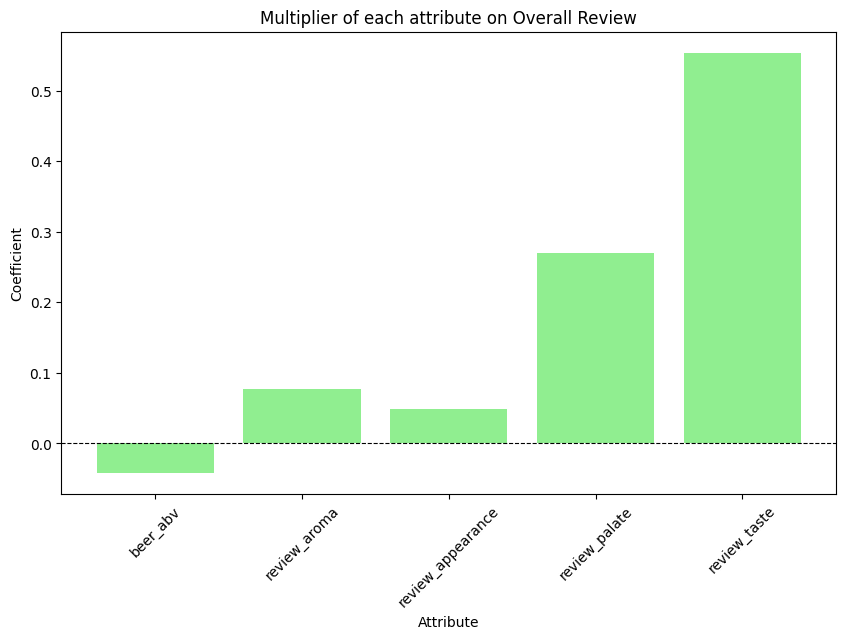

In [98]:
# performance evaluation
mse_overall = mean_squared_error(y_overall_test, y_overall_pred)
r2_overall = r2_score(y_overall_test, y_overall_pred)

print(f'Mean Squared Error: {mse_overall}')
print(f'R^2 Score: {r2_overall}')

# Multipliers of each attribute on Overall_Review attribute
coeff_overall = model.coef_
print(f'Multipliers: {coeff_overall}')

# Plotting Coefficients
plt.figure(figsize=(10, 6))
plt.bar(X_overall.columns, coeff_overall, color='lightgreen')
plt.title('Multiplier of each attribute on Overall Review')
plt.ylabel('Coefficient')
plt.xlabel('Attribute')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

### Interpretation of the results

#### 1. Mean Squared Error(MSE):
* Value: 0.17
* Interpretation: The average squared difference between the estimated values and the actual value is 0.17. 
#### 2. R-squared(R^2):
* Value: 0.67
* Interpretation: 67% of the variance in the dependent variable can be explained by the independent variables.
* The rest of the variance is due to other variables that are not used in the model.
#### 3. Coefficients:
* The coefficients of the independent variables show how much the dependent variable changes when the independent variable changes by one unit.
* The coefficients are as follows:
    * beer_abv: -0.0414
    * review_aroma: 0.0766
    * review_appearance: 0.0482
    * review_palate: 0.2706
    * review_taste: 0.5539

## 6. Conclusion

## Key Attributes Affecting Overall Review:

* Taste is the most influential factor, with a positive coefficient of 0.404. This indicates that as the taste score increases by one unit, the overall review score increases by approximately 0.55. Breweries should focus on optimizing the taste of their beers to improve overall consumer satisfaction.

* Palate, with a coefficient of 0.27, is the second most important factor. This suggests that the feel of the beer in the mouth (texture, carbonation, etc.) plays a notable role. 

* Aroma and appearance have smaller but still positive effects, with coefficients of 0.076 and 0.048. While these attributes contribute to the overall review, their impact is smaller compared to taste and palate.

* Alcohol by Volume (ABV), interestingly, has a negative coefficient (-0.041), meaning higher alcohol content may slightly detract from the overall review score. This suggests that consumers prefer beers with lower ABV, at least within the range of the dataset.

## Tips for Breweries:
* Breweries should prioritize taste and palate when making new beers.
* Exceccive alcohol content should be avoided to maintain consumer satisfaction.